# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [20]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,0.0,0.0
2024-01-04 00:00:00-05:00,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,0.0,0.0


In [21]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [22]:
dfo.options  #to get the date of different expiration time

('2024-01-05',
 '2024-01-08',
 '2024-01-09',
 '2024-01-10',
 '2024-01-11',
 '2024-01-12',
 '2024-01-16',
 '2024-01-17',
 '2024-01-18',
 '2024-01-19',
 '2024-01-22',
 '2024-01-23',
 '2024-01-24',
 '2024-01-25',
 '2024-01-26',
 '2024-01-29',
 '2024-01-30',
 '2024-01-31',
 '2024-02-01',
 '2024-02-02',
 '2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-09',
 '2024-02-12',
 '2024-02-16',
 '2024-02-29',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [23]:
dfo_exp = dfo.option_chain(dfo.options[2])  #you can change index to try on different expiry dates

In [24]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240109C03850000,2023-12-01 14:55:56+00:00,3850.0,733.83,917.3,928.0,0.0,0.0,4.0,2,1.562273,True,REGULAR,USD
1,SPXW240109C03900000,2023-12-01 14:54:47+00:00,3900.0,685.76,867.4,878.1,0.0,0.0,46.0,23,1.491488,True,REGULAR,USD
2,SPXW240109C03950000,2023-12-01 14:55:11+00:00,3950.0,636.41,817.5,828.1,0.0,0.0,2.0,1,1.420505,True,REGULAR,USD
3,SPXW240109C04300000,2023-12-14 15:04:53+00:00,4300.0,443.00,418.0,423.9,0.0,0.0,1.0,1,0.435034,True,REGULAR,USD
4,SPXW240109C04350000,2023-12-29 15:32:39+00:00,4350.0,440.50,364.1,370.4,0.0,0.0,1.0,2,0.000010,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [25]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(1+ df['Close'].pct_change()) #your code here
    log_return = log_return.dropna() #your code here  #to remove nan
    daily_vol = log_return.std()#your code here
    vol = daily_vol*np.sqrt(252) #your code here

    return vol

In [26]:
vol = annual_vol(df)
vol

0.19445781797526288

# **BLACK-SCHOLES MODEL**


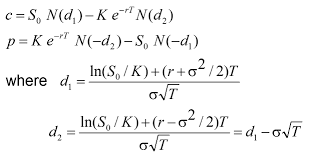

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [27]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """
    d1=(np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    if(option=='call'):
      premium=S*ss.norm.cdf(d1)-K*np.exp(-r*T)*ss.norm.cdf(d2)
    elif(option=='put'):
      premium=K*np.exp(-r*T)*ss.norm.cdf(-d2)-S*ss.norm.cdf(-d1)
    else:
      print("Invalid option type")
    return premium


   #your code here

In [28]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [29]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
3850.0,838.680403
3900.0,788.680406
3950.0,738.680409
4300.0,388.728806
4350.0,338.868141


In [30]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
3850.0,733.83
3900.0,685.76
3950.0,636.41
4300.0,443.00
4350.0,440.50


In [31]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
3850.0,838.680403,733.83
3900.0,788.680406,685.76
3950.0,738.680409,636.41
4300.0,388.728806,443.00
4350.0,338.868141,440.50
4370.0,318.989714,419.97
4375.0,314.029534,339.88
4380.0,309.073900,397.81
4390.0,299.178074,224.39
4400.0,289.306195,374.38


<Axes: >

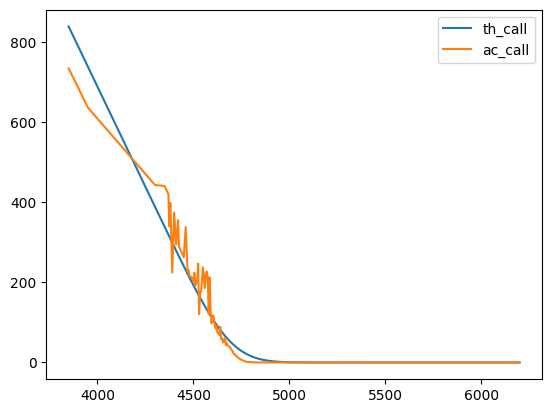

In [32]:
call.plot() #plotting the actual and theoretical call prices

In [33]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2000.0,2.578339e-192
2400.0,2.230048e-119
2800.0,2.990633e-71
3000.0,1.011437e-53
3200.0,1.454243e-39


In [34]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
2000.0,0.05
2400.0,0.07
2800.0,0.05
3000.0,0.05
3200.0,0.05


In [35]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
4920.0,234.020554,125.37
4925.0,238.799941,130.02
4950.0,262.917628,175.37
5000.0,311.939193,423.80
5025.0,336.692420,278.34
5050.0,361.538856,256.38
5100.0,411.390376,398.33
5200.0,511.325094,606.50
5400.0,711.319427,810.65
5800.0,1111.319384,1064.16


<Axes: >

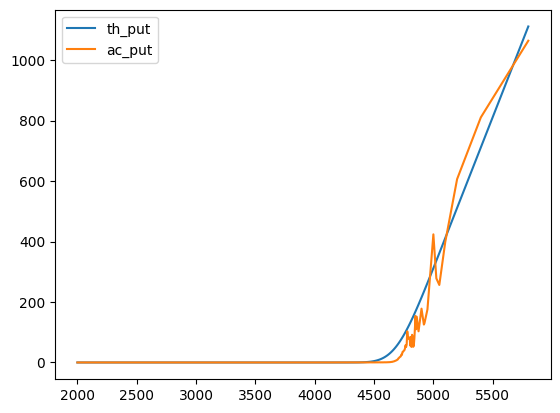

In [36]:
put.plot()